<!-- Student -->
# Introduction to Computational Physics - Week 6 ##
<!-- ToC -->

<!-- Student -->
## Table of contents week 6
 
Introduction to Computational Physics - Week 5: [>>](#Introduction-to-Computational-Physics---Week-5)  
-Table of contents week 5: [>>](#Table-of-contents-week-5)  
-Introduction to week 5: [>>](#Introduction-to-week-5)  
-Projectile motion with no air resistance: [>>](#Projectile-motion-with-no-air-resistance)  
--Week 5 exercise 1: [>>](#Week-5-exercise-1)  
--Week 5 exercise 1 answer: [>>](#Week-5-exercise-1-answer)  
-Projectile motion with air resistance: [>>](#Projectile-motion-with-air-resistance)  
--Week 5 exercise 2: [>>](#Week-5-exercise-2)  
--Week 5 exercise 2 answer: [>>](#Week-5-exercise-2-answer)  
-Projectile motion: behaviour of velocity with time: [>>](#Projectile-motion:-behaviour-of-velocity-with-time)  
--Week 5 exercise 3: [>>](#Week-5-exercise-3)  
--Week 5 exercise 3 answer: [>>](#Week-5-exercise-3-answer)  
-Putting multiple plots in one figure: [>>](#Putting-multiple-plots-in-one-figure)  
--Week 5 exercise 4: [>>](#Week-5-exercise-4)  
--Week 5 exercise 4 answer: [>>](#Week-5-exercise-4-answer)  
-Comments on week 5: [>>](#Comments-on-week-5)  
-Week 5 marks: [>>](#Week-5-marks)  

<!-- Student -->
## Introduction to week 6

This week we shall use Euler's method and some of the programming techniques we have developed to look at a physics problem that cannot be solved analytically: projectile motion with air resistance. We shall then look at some more plotting routines.

## Projectile motion with no air resistance
We know we can work out the path of a projectile algebraically in the absence of air resistance. We use Newton's Second Law:

\begin{align*}
\vec{F} &= m\vec{a}\\
  &= m\frac{d}{dt}\vec{v}\\
  &= m\frac{d^2}{dt^2}\vec{r},
\end{align*}

where, $\vec{F}$ is the force, $m$ the mass, $\vec{v}$ velocity, $\vec{r}$ the position and $t$ the time. Separating the motion into its horizontal ($x$) and vertical ($y$) components, for the former we have:

\begin{align*}
\frac{d^2x}{dt^2} &= 0,\\
\Rightarrow \frac{dx}{dt} &= u_{x},\\
\Rightarrow x &= u_{x} t + x_0.
\end{align*}

Here, $u_{x}$ is the inital velocity of the projectile in the $x$ direction and $x_0$ its initial position. Taking the origin of the $x$ axis to be the position from which the projectile is launched at $t = 0$ gives $x_0 = 0$.

In the vertical direction, setting the vertical force to be $mg$,  with $g = -9.81\,$ms$^{-2}$, we have:

\begin{align*}
m\frac{d^2y}{dt^2} &= mg,\\
\Rightarrow \frac{d^2y}{dt^2} &= g,\\
\Rightarrow \frac{dy}{dt} &= gt + u_{y},\\
\Rightarrow y &= \frac{1}{2}gt^2 + u_{y} t + y_0,
\end{align*}

where $u_{y}$ is the inital vertical velocity and we have assumed the height from which the projectile is launched is $y = y_0$.

Setting $y_0 = 0$ for simplicity, the times at which the projectile is at ground level can be found from:

\begin{align*}
y &= 0\\
 \Rightarrow \frac{1}{2}gt^2 + u_{y}t &= 0\\
 \Rightarrow t\left( \frac{gt}{2} + u_{y} \right) &= 0\\
 \Rightarrow t &= 0{\mbox{ or }} - \frac{2u_{y}}{g}.
\end{align*}

Taking $u_{x} = 30\,$ms$^{-1}$ and $u_{y} = 40\,$ms$^{-1}$, the trajectory of the projectile can be plotted using the equations for the vertical and horizontal motion in terms of the time.

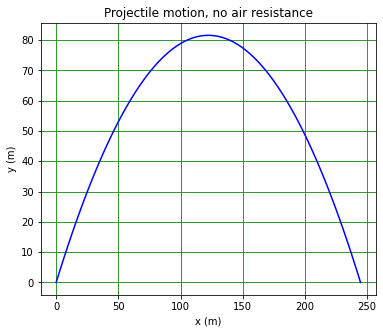

In [2]:
# <!-- Student -->
#
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#
ux = 30 # m/s
uy = 40 # m/s
g = -9.81 # m/s**2
tMax = -2*uy/g # s
nSteps = 100
tArr = np.linspace(0.0, tMax, nSteps)
#
xArr = ux*tArr
yArr = 0.5*g*tArr**2 + uy*tArr
#
plt.figure(figsize = (6, 5))
plt.title("Projectile motion, no air resistance")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.plot(xArr, yArr, linestyle = '-', color = 'b')
plt.grid(color = 'g')
plt.show()

<!-- Student -->
### Week 6 exercise 1

Plot the $x$ and $y$ coordinates of the projectile as a function of $t$.

<!-- Demo -->
### Week 6 exercise 1 answer

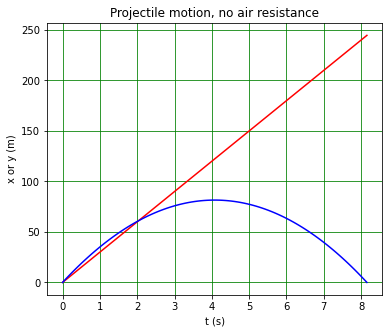

In [3]:
# <!-- Demo -->
#
plt.figure(figsize = (6, 5))
plt.title("Projectile motion, no air resistance")
plt.xlabel("t (s)")
plt.ylabel("x or y (m)")
plt.plot(tArr, xArr, linestyle = '-', color = 'r')
plt.plot(tArr, yArr, linestyle = '-', color = 'b')
plt.grid(color = 'g')
plt.show()

<!-- Student -->
## Projectile motion with air resistance

What happens of we include the effect of air resistance? In addition to the gravitational force, the projectile then experiences a drag force which acts in the opposite direction to its velocity. The magnitude of the force is given by:

$$
D = \frac{1}{2}C_D \rho_{\rm {air}} A v^2,
$$

where $C_D$ is the drag coefficient (which is dependent on the projectile's shape), $\rho_{\rm{air}}$ is the density of air and $A$ is the area of the projectile in the plane normal to its velocity. The expression for the horizontal acceleration of the projectile is modified as follows:

\begin{align*}
m\frac{d^2x}{dt^2} &= -D\cos \theta \\
 \Rightarrow \frac{d^2x}{dt^2} &= -\frac{D}{m}\cos \theta, 
\end{align*}

where $\theta$ is the angle the velocity makes to the horizontal. Notice that we cannot write down a simple expression for $v_x = \frac{dx}{dt}$ in terms of $t$: there is no algebraic form for the integral as $\theta$ is a function of $t$.

The expression for the vertical acceleration becomes:

\begin{align*}
m\frac{d^2y}{dt^2} &= -D\sin \theta  + mg\\
 \Rightarrow \frac{d^2y}{dt^2} &= -\frac{D}{m}\sin \theta  + g.
\end{align*}

Again, we cannot write down an algebraic expression for $v_y = \frac{dy}{dt}$. 

In order to plot the trajectory with air resistance, we need to resort to numerical methods. The simplest technique is to break the trajectory down into a set of small steps, each of which takes only a small time $\delta t$. Given the force, acceleration, velocity and position at the start of each step, we can calculate these quantities at the end of the step. Repeating this process many times allows us to map out the trajectory. Horizontally, for the $i^{\rm{th}}$ step, the change in velocity is given by:

\begin{align*}
\frac{d^2x_i}{dt^2} &= \frac{dv_{x\,i}}{dt} = -\frac{D_i}m\cos \theta_i \\
 \Rightarrow \delta v_{x\,i} &= -\frac{D_i}{m}\cos \theta_i \,\delta t.
\end{align*}

The change in the vertical velocity is:

\begin{align*}
\frac{d^2y_i}{dt^2} &= \frac{dv_{y\,i}}{dt} = -\frac{D_i}{m}\sin \theta_i  + g\\
 \Rightarrow \delta v_{y\,i} &= -\frac{D_i}{m}\sin \theta_i \, \delta t + g\,\delta t.
\end{align*}

Hence, at the end of the step, the components of the velocity are:

\begin{align*}
{v_{x\,i + 1}} &= {v_{x\,i}} + \delta {v_{x\,i}}\\
{v_{y\,i + 1}} &= {v_{y\,i}} + \delta {v_{y\,i}}.
\end{align*}

The position at the end of the step is given by:

\begin{align*}
x_{i + 1} &= x_i + v_{x\,i} \delta t \\
y_{i + 1} &= y_i + v_{y\,i} \delta t.
\end{align*}

We now use this approach, referred to as the Euler method, to plot the trajectory of the projectile.

 
Radius 0.025 m, mass 0.131 kg.
Initial position ( 0.00,  0.00) m.
Initial velocity (30.00, 40.00) m/s.
Maximum time 8.155 s, time step 8.155e-04 s.
Final step is number 8347, actual flight time 6.807 s.


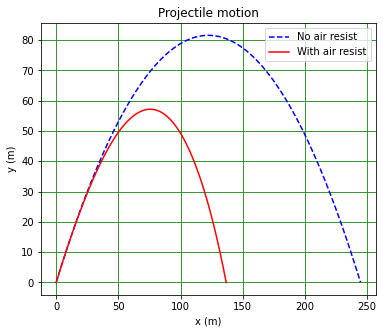

In [4]:
# <!-- Student -->
#
def drag(cd, area, rho, velx, vely):
    '''
    Return horizontal and vertical drag force on body given its drag coefficient, area, 
    density of medium in which it's moving and horizontal and vertical velocity.
    '''
    v2 = velx**2 + vely**2
    sinTheta = vely/np.sqrt(v2)
    cosTheta = velx/np.sqrt(v2)
    Dx = -0.5*cd*rho*area*v2*cosTheta
    Dy = -0.5*cd*rho*area*v2*sinTheta
    return Dx, Dy
#
nEuler = 10000
dt = tMax/nEuler
xEuler = np.zeros(nEuler)
yEuler = np.zeros(nEuler)
xE = 0.0 # m
yE = 0.0 # m
vX = ux # m/s
vY = uy # m/s
CD = 0.47 
rad = 0.025 # m
Area = np.pi*rad**2 # m**2
rhoAir = 1.2 # kg/m**3
rhoProj = 2000.0 # kg/m**3
mProj = 4/3*np.pi*rad**3*rhoProj # kg
print(" ")
print("Radius {:5.3f} m, mass {:5.3f} kg.".format(rad, mProj))
print("Initial position ({:5.2f}, {:5.2f}) m.".format(xE, yE))
print("Initial velocity ({:5.2f}, {:5.2f}) m/s.".format(vX, vY))
print("Maximum time {:5.3f} s, time step {:5.3e} s.".format(tMax, dt))
#
iStep = 0
while (yE > 0 or iStep == 0) and iStep < nEuler:
    xEuler[iStep] = xE
    yEuler[iStep] = yE
    xE = xE + vX*dt
    yE = yE + vY*dt
    dragX, dragY = drag(CD, Area, rhoAir, vX, vY)
    vX = vX + dragX/mProj*dt
    vY = vY + dragY/mProj*dt + g*dt
    iStep = iStep + 1
#
print("Final step is number {:d}, actual flight time {:5.3f} s.".format(iStep, iStep*dt))
plt.figure(figsize = (6, 5))
plt.title("Projectile motion")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.plot(xArr, yArr, linestyle = '--', color = 'b', label = 'No air resist')
plt.plot(xEuler[0:iStep], yEuler[0:iStep], linestyle = '-', color = 'r', label = 'With air resist')
plt.grid(color = 'g')
plt.legend()
plt.show()

<!-- Student -->
### Week 6 exercise 2

How could you test that the Euler method is functioning correctly? Make a plot demonstrating your test. Use it to determine the approximate minimum number of steps needed to get a reliable solution for this problem.

<!-- Demo -->
### Week 6 exercise 2 answer

Set the drag coefficient to zero (or the area, or the density of air) and check that the Euler method reproduces the algebraic solution. Vary `nEuler` to find out where visible disagreement occurs. (Need at least roughly 1000 steps.) 

 
Radius 0.025 m, mass 0.131 kg.
Initial position ( 0.00,  0.00) m.
Initial velocity (30.00, 40.00) m/s.
Maximum time 8.155 s, time step 8.155e-03 s.
Final step is number 1000, actual flight time 8.155 s.


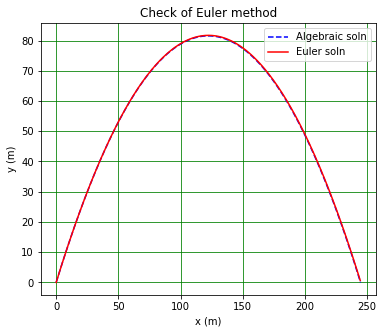

In [5]:
# <!-- Demo -->
#
nEuler = 1000
dt = tMax/nEuler
xEuler = np.zeros(nEuler)
yEuler = np.zeros(nEuler)
xE = 0.0 # m
yE = 0.0 # m
vX = ux # m/s
vY = uy # m/s
CD = 0.0 
rad = 0.025 # m
Area = np.pi*rad**2 # m**2
rhoAir = 1.2 # kg/m**3
rhoProj = 2000.0 # kg/m**3
mProj = 4/3*np.pi*rad**3*rhoProj # kg
print(" ")
print("Radius {:5.3f} m, mass {:5.3f} kg.".format(rad, mProj))
print("Initial position ({:5.2f}, {:5.2f}) m.".format(xE, yE))
print("Initial velocity ({:5.2f}, {:5.2f}) m/s.".format(vX, vY))
print("Maximum time {:5.3f} s, time step {:5.3e} s.".format(tMax, dt))
#
iStep = 0
while (yE > 0 or iStep == 0) and iStep < nEuler:
    xEuler[iStep] = xE
    yEuler[iStep] = yE
    xE = xE + vX*dt
    yE = yE + vY*dt
    dragX, dragY = drag(CD, Area, rhoAir, vX, vY)
    vX = vX + dragX/mProj*dt
    vY = vY + dragY/mProj*dt + g*dt
    iStep = iStep + 1
#
print("Final step is number {:d}, actual flight time {:5.3f} s.".format(iStep, iStep*dt))
plt.figure(figsize = (6, 5))
plt.title("Check of Euler method")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.plot(xArr, yArr, linestyle = '--', color = 'b', label = 'Algebraic soln')
plt.plot(xEuler[0:iStep], yEuler[0:iStep], linestyle = '-', color = 'r', label = 'Euler soln')
plt.grid(color = 'g')
plt.legend()
plt.show()

<!-- Student -->
## Projectile motion: behaviour of velocity with time
It is interesting to investigate the behaviour of the $x$ and $y$ components of the velocity with time. The following code allows this to be done for the horizontal component of the velocity.

 
Radius 0.025 m, mass 0.131 kg.
Initial position ( 0.00,  0.00) m.
Initial velocity (30.00, 40.00) m/s.
Maximum time 8.155 s, time step 8.155e-04 s.
Final step is number 8347, actual flight time 6.807 s.


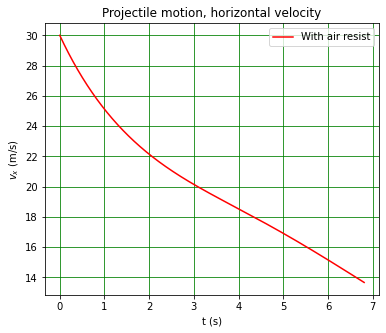

In [6]:
# <!-- Student -->
#
nEuler = 10000
dt = tMax/nEuler
xEuler = np.zeros(nEuler)
yEuler = np.zeros(nEuler)
vXEuler = np.zeros(nEuler)
xE = 0.0
yE = 0.0
vX = ux
vY = uy
CD = 0.47
rad = 0.025
Area = np.pi*rad**2
rhoAir = 1.2
rhoProj = 2000.0
mProj = 4/3*np.pi*rad**3*rhoProj
print(" ")
print("Radius {:5.3f} m, mass {:5.3f} kg.".format(rad, mProj))
print("Initial position ({:5.2f}, {:5.2f}) m.".format(xE, yE))
print("Initial velocity ({:5.2f}, {:5.2f}) m/s.".format(vX, vY))
print("Maximum time {:5.3f} s, time step {:5.3e} s.".format(tMax, dt))
#
iStep = 0
while (yE > 0 or iStep == 0) and iStep < nEuler:
    xEuler[iStep] = xE
    yEuler[iStep] = yE
    vXEuler[iStep] = vX
    xE = xE + vX*dt
    yE = yE + vY*dt
    dragX, dragY = drag(CD, Area, rhoAir, vX, vY)
    vX = vX + dragX/mProj*dt
    vY = vY + dragY/mProj*dt + g*dt
    iStep = iStep + 1
#
print("Final step is number {:d}, actual flight time {:5.3f} s.".format(iStep, iStep*dt))
tEuler = np.linspace(0.0, tMax, nEuler)
plt.figure(figsize = (6, 5))
plt.title("Projectile motion, horizontal velocity")
plt.xlabel("t (s)")
plt.ylabel(r"$v_x$ (m/s)")
plt.plot(tEuler[0:iStep], vXEuler[0:iStep], linestyle = '-', color = 'r', label = 'With air resist')
plt.grid(color = 'g')
plt.legend()
plt.show()

<!-- Student -->
### Week 6 exercise 3

Copy the above code into a new cell below this one. Modify the code so that the graph shows how both the horizontal and vertical components of the velocity vary as a function of time.

<!-- Demo -->
### Week 6 exercise 3 answer

 
Radius 0.025 m, mass 0.131 kg
Initial position ( 0.00,  0.00 m)
Initial velocity (30.00, 40.00 m/s)
Maximum time 8.155 s, time step 8.155e-04 s
Final step is number 8347, actual flight time 6.807 s.


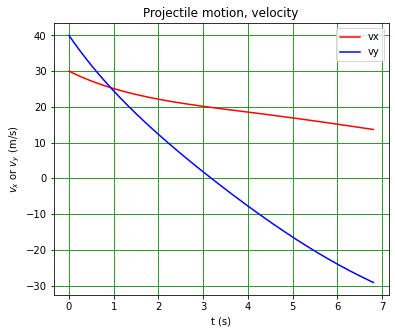

In [7]:
# <!-- Demo -->
#
nEuler = 10000
dt = tMax/nEuler
xEuler = np.zeros(nEuler)
yEuler = np.zeros(nEuler)
vXEuler = np.zeros(nEuler)
vYEuler = np.zeros(nEuler)
xE = 0.0
yE = 0.0
vX = ux
vY = uy
CD = 0.47
rad = 0.025
Area = np.pi*rad**2
rhoAir = 1.2
rhoProj = 2000.0
mProj = 4/3*np.pi*rad**3*rhoProj
print(" ")
print("Radius {:5.3f} m, mass {:5.3f} kg".format(rad, mProj))
print("Initial position ({:5.2f}, {:5.2f} m)".format(xE, yE))
print("Initial velocity ({:5.2f}, {:5.2f} m/s)".format(vX, vY))
print("Maximum time {:5.3f} s, time step {:5.3e} s".format(tMax, dt))
#
iStep = 0
while (yE > 0 or iStep == 0) and iStep < nEuler:
    xEuler[iStep] = xE
    yEuler[iStep] = yE
    vXEuler[iStep] = vX
    vYEuler[iStep] = vY
    xE = xE + vX*dt
    yE = yE + vY*dt
    dragX, dragY = drag(CD, Area, rhoAir, vX, vY)
    vX = vX + dragX/mProj*dt
    vY = vY + dragY/mProj*dt + g*dt
    iStep = iStep + 1
#
print("Final step is number {:d}, actual flight time {:5.3f} s.".format(iStep, iStep*dt))
tEuler = np.linspace(0.0, tMax, nEuler)
plt.figure(figsize = (6, 5))
plt.title("Projectile motion, velocity")
plt.xlabel("t (s)")
plt.ylabel(r"$v_x$ or $v_y$ (m/s)")
plt.plot(tEuler[0:iStep], vXEuler[0:iStep], linestyle = '-', color = 'r', label = 'vx')
plt.plot(tEuler[0:iStep], vYEuler[0:iStep], linestyle = '-', color = 'b', label = 'vy')
plt.grid(color = 'g')
plt.legend()
plt.show()

<!-- Student -->
## Putting multiple plots in one figure

Sometimes it is useful to be able to incorporate more than one plot in a figure. This can be done using `matplotlib.pyplot` as is shown below.

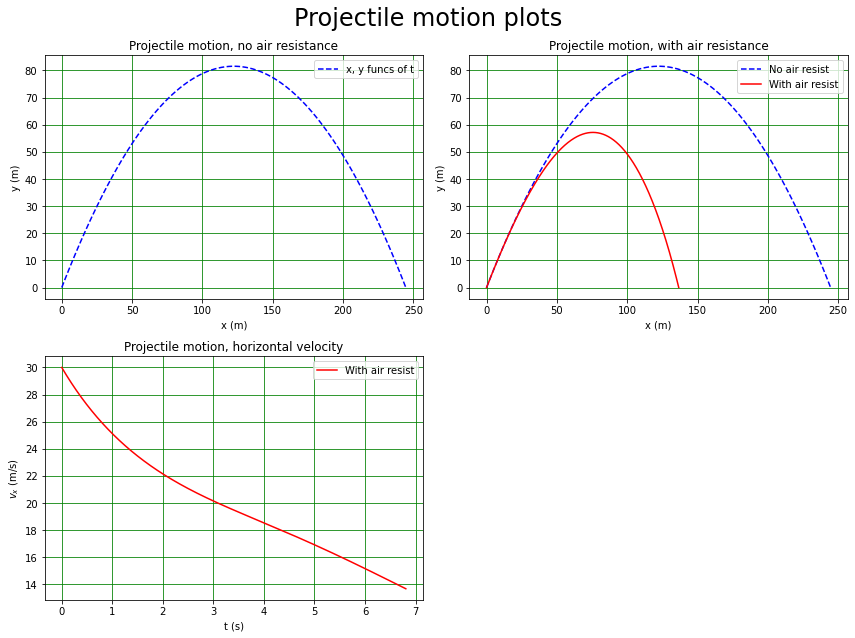

In [8]:
# <!-- Student -->
#
fig = plt.figure(figsize = (12, 9)) # opens a figure 
fig.suptitle('Projectile motion plots', fontsize=24) # overall title
#
plt.subplot(2, 2, 1) # creates a 3 row, 1 column grid and starts in the first (top left) square 
plt.title("Projectile motion, no air resistance")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.plot(xArr, yArr, linestyle = '--', color = 'b', label = 'x, y funcs of t')
plt.legend()
plt.grid(color = 'g')
#
plt.subplot(2, 2, 2) # plot in second square (reading from left to right, top to bottom)
plt.title("Projectile motion, with air resistance")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.plot(xArr, yArr, linestyle = '--', color = 'b', label = 'No air resist')
plt.plot(xEuler[0:iStep], yEuler[0:iStep], linestyle = '-', color = 'r', label = 'With air resist')
plt.grid(color = 'g')
plt.legend()
#
plt.subplot(2, 2, 3) # plot in third square
plt.title("Projectile motion, horizontal velocity")
plt.xlabel("t (s)")
plt.ylabel(r"$v_x$ (m/s)")
plt.plot(tEuler[0:iStep], vXEuler[0:iStep], linestyle = '-', color = 'r', label = 'With air resist')
plt.grid(color = 'g')
plt.legend()
#
plt.tight_layout()
plt.show()

<!-- Student -->

The figure is created as before, using `fig = plt.figure(figsize = (6, 16))`. You will have to adjust the size parameters so there is space for all your subplots!

The command `fig.suptitle('Projectile motion plots', fontsize=20)` produces an overall title for the figure.

Each supbplot is created using `plt.subplot(nRows, nCols, nThisPlot)`. Here, the values `nRows` and `nCols` tell Python to draw an array of subplots with (you've guessed it) `nRows` rows and `nCols` columns. Note that almost everywhere, rows and columns are given in that order! The index `nThisPlot` indicates which position the current plot is to fill. The first (with `nThisPlot = 1` is the top left slot, the second (`nThisPlot = 2`) is next slot reading from left-to-right and top-to-bottom, and so on. The commands that we have used for single  plots can be used for subplots (titles, axis labels etc.). 

The command `plt.tight_layout()` ensures the space between the plots, their titles and the overall title is minimised.

The figure is displayed using the `fig.show()` command.

### Week 6 exercise 4

Copy the code above to a new cell below this one and add a fourth subplot which shows the behaviour of the vertical velocity with time.

<!-- Demo -->
### Week 6 exercise 4 answer

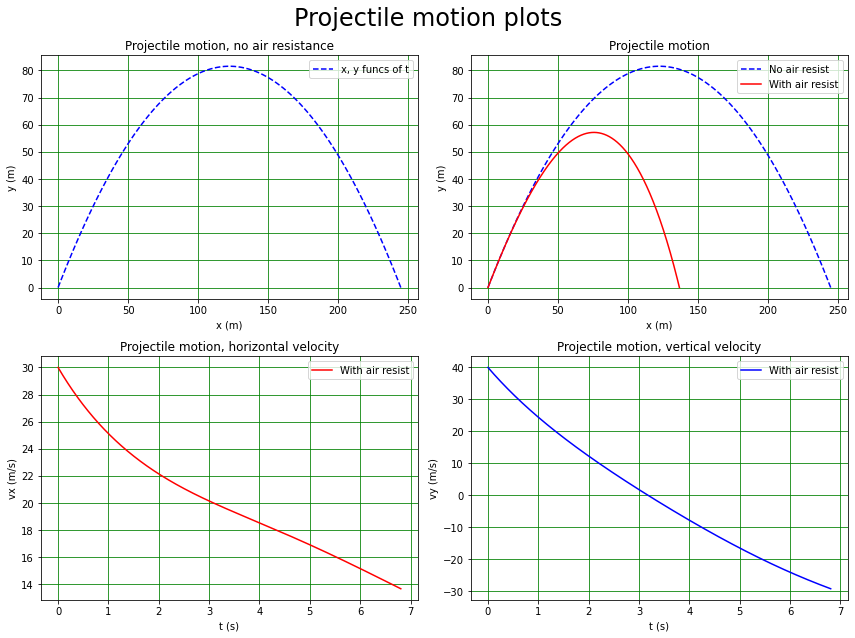

In [9]:
# <!-- Demo -->
#
fig = plt.figure(figsize = (12, 9)) # opens a figure 
fig.suptitle('Projectile motion plots', fontsize=24) # overall title
#
plt.subplot(2,2,1) # creates a 2 row, 2 column grid and starts in the first (top left) square 
plt.title("Projectile motion, no air resistance")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.plot(xArr, yArr, linestyle = '--', color = 'b', label = 'x, y funcs of t')
plt.legend()
plt.grid(color = 'g')
#
plt.subplot(2,2,2) # plot in second square (reading from left to right, top to bottom)
plt.title("Projectile motion")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.plot(xArr, yArr, linestyle = '--', color = 'b', label = 'No air resist')
plt.plot(xEuler[0:iStep], yEuler[0:iStep], linestyle = '-', color = 'r', label = 'With air resist')
plt.grid(color = 'g')
plt.legend()
#
plt.subplot(2,2,3) # plot in third square
plt.title("Projectile motion, horizontal velocity")
plt.xlabel("t (s)")
plt.ylabel("vx (m/s)")
plt.plot(tEuler[0:iStep], vXEuler[0:iStep], linestyle = '-', color = 'r', label = 'With air resist')
plt.grid(color = 'g')
plt.legend()
#
plt.subplot(2,2,4) # plot in fourth square
plt.title("Projectile motion, vertical velocity")
plt.xlabel("t (s)")
plt.ylabel("vy (m/s)")
plt.plot(tEuler[0:iStep], vYEuler[0:iStep], linestyle = '-', color = 'b', label = 'With air resist')
plt.grid(color = 'g')
plt.legend()
#
plt.tight_layout()
plt.show()

<!-- Student -->
## Comments on week 6

This week, we have solved a problem that cannot be tackled algebraically. Many situations in Physics require this kind of numerical approach. The Euler method we have used is a powerful technique in that the way it works is obvious (though actually getting a program using the method to do what you want it to may not be easy!) and is applicable to many equations. The downside of the Euler method is that it only works if the step size is small enough, so you must think about how you can check that step size you are using is adequate!

<!-- Demo -->
## Week 6 marks


|Exercise   | Mark    | Comments              |
|-----------|---------|-----------------------|
| 1         | 2       |                       |
| 2         | 3       |                       |
| 3         | 3       |                       |
| 4         | 2       |                       |
| **Total** | **10**  |                       |